# lines

Example scatterplots with Formula 1 data from
https://ergast.com/mrd/db

In [1]:
%load_ext autoreload
%autoreload 2
%autosave 0

from etl import DATADIR, ErgastF1
from viz import Plot

f1 = ErgastF1(DATADIR / 'ergast/f1.zip')
plot = Plot()

Autosave disabled


## What's an undercut?

In [2]:
def id_race(year, name):
    """ int: id_race for given year and race name. """
    races = (
        f1.races
        .loc[lambda df: df['season'].eq(year)]
        .loc[lambda df: df['race'].eq(name)]
    )
    return races.index.values[0]
            
def lapgaps(id_race):
    """
    DataFrame: Gap to leader on each lap.
    Columns are driver names sorted by gap on last lap.
    """
    data = (
        f1.lap_times
        .loc[lambda df: df['id_race'].eq(id_race)]
        .join(f1.drivers['driver'], on='id_driver')
        .pivot(index='lap', columns='driver', values='seconds')
        .cumsum()
    )
    data = data.sub(data.min(axis=1), axis=0)
    cols = data.iloc[-1].sort_values().index
    
    return data[cols]

def showgaps(year, name, **color):
    """ None: Plot gap to leader on each lap for each driver. """
    gaps = lapgaps(id_race(year, name))
    kw = dict()
    kw['color'] = gaps.columns.map(color).fillna('#dadada')
    kw['title'] = f"{year} {name}"
    kw['ylim'] = (55, -5)
    kw['ylabel'] = 'gap to leader'
    plot.line(gaps, **kw)

In [3]:
color = dict()
color['Lewis Hamilton'] = 'teal'
color['Valtteri Bottas'] = 'blue'
color['Sebastian Vettel'] = 'red'
color['Charles Leclerc'] = 'gold'
color['Max Verstappen'] = 'purple'
color['Kimi Räikkönen'] = 'black'
color['Lance Stroll'] = 'pink'

## under the rainbow

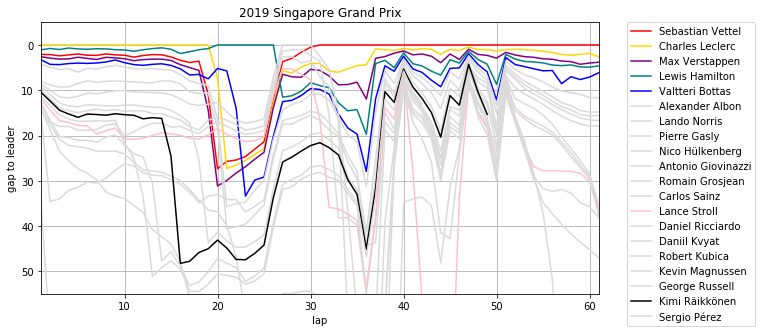

In [4]:
showgaps(2019, 'Singapore Grand Prix', **color)

## en garde

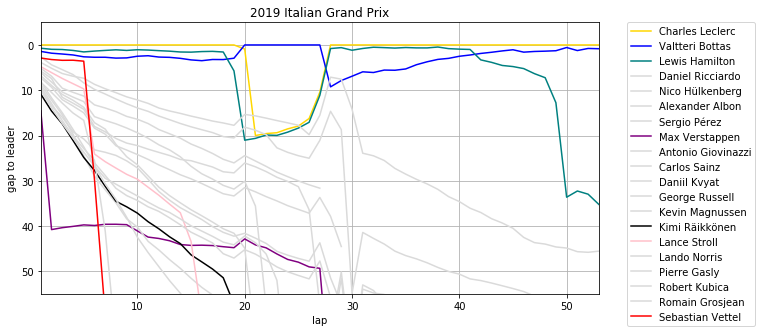

In [5]:
showgaps(2019, 'Italian Grand Prix', **color)

## maximum overdrive

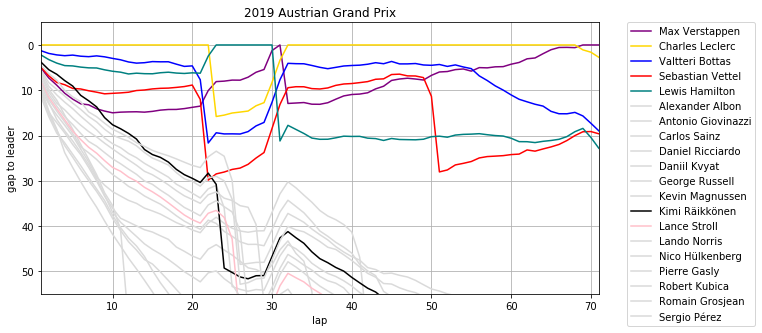

In [6]:
showgaps(2019, 'Austrian Grand Prix', **color)

## finnish line

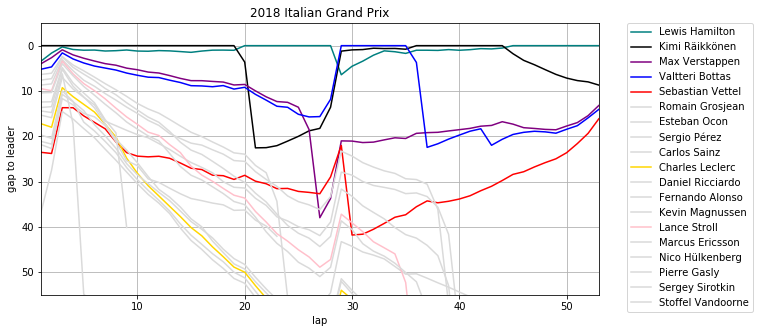

In [7]:
showgaps(2018, 'Italian Grand Prix', **color)